In [1]:
import numpy as np
import pandas as pd

#pd.options.display.precision=2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [2]:
pd.set_option('max_rows', 10)
pd.set_option('precision', 10)

In [3]:
excel_data=pd.read_excel('SalesStats.xlsx')
excel_data.rename(columns={'YEAR':'Year'},inplace=True)
excel_data.head(3)

,Year,Store,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
0,2003,Agencia Bacolod,100618.8,67545.0,62699.1,55016.1,56048,40477.1,30573.5,41342.6,37349.5,41871.05,28002.0,47260.5,608803.25
1,2003,Centro - Butuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,2003,Centro - Catbalogan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [4]:
melt_data=excel_data.melt(id_vars=['Year','Store'], 
                  value_vars=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                  var_name='Month', value_name='Sales')
melt_data.sort_values(['Year','Store'],inplace=True)
display(melt_data.head(3))

,Year,Store,Month,Sales
0,2003,Agencia Bacolod,Jan,100618.8
1234,2003,Agencia Bacolod,Feb,67545
2468,2003,Agencia Bacolod,Mar,62699.1


In [5]:
from time import strptime
from datetime import datetime
melt_data['Date']=melt_data.apply(lambda row: datetime(row['Year'],(strptime(row['Month'],'%b').tm_mon),1),axis=1)

melt_data['Sales']=melt_data['Sales'].astype(str)
melt_data['Sales']=melt_data['Sales'].replace(r'\s+', np.nan, regex=True)
melt_data['Sales']=melt_data['Sales'].astype(float)
#melt_data.astype({'Sales':float},inplace=True)
#melt_data.dropna(inplace=True)
#melt_data.astype({'Sales':float})
display(melt_data.head(3))

,Year,Store,Month,Sales,Date
0,2003,Agencia Bacolod,Jan,100618.8,2003-01-01
1234,2003,Agencia Bacolod,Feb,67545.0,2003-02-01
2468,2003,Agencia Bacolod,Mar,62699.1,2003-03-01


In [6]:
store_data=melt_data.drop(columns=['Year','Month'])
store_data.set_index('Date',inplace=True)
display(store_data.head(3))

,Store,Sales
Date,,
2003-01-01,Agencia Bacolod,100618.8
2003-02-01,Agencia Bacolod,67545.0
2003-03-01,Agencia Bacolod,62699.1


,Sales
Date,
2003-01-01,2.2387705600e+06
2003-02-01,1.8763831500e+06
2003-03-01,2.0831725900e+06


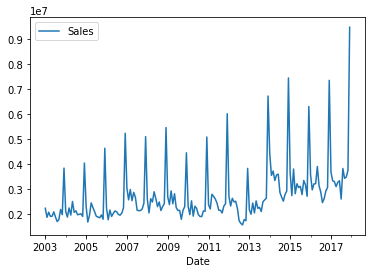

In [7]:
data=store_data.groupby('Date').sum()
display(data.head(3))
data.plot()

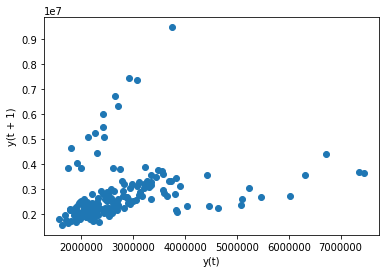

In [8]:
from pandas.plotting import lag_plot
lag_plot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000176F6A24358>]],
      dtype=object)

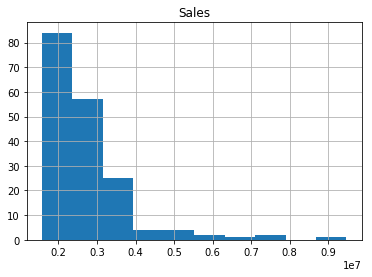

In [9]:
data.hist()

In [10]:

def dec_plot(data):
    from statsmodels.tsa.seasonal import seasonal_decompose
    result=seasonal_decompose(data,model='additive')
    result.plot()
    plt.show();

def corr_plot(data):
    from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
    acf=plot_acf(data,lags=25,zero=False)
    plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
    pacf=plot_pacf(data,lags=25,zero=False)
    plt.show()
    
def adf_test(data):
    from statsmodels.tsa.stattools import adfuller
    result=adfuller(data['Sales'])
    df_res=pd.Series(result[0:4],index=['ADF Test Statistic','p-value','#lags used','# of observations'])
    for key,value in result[4].items():
        df_res['Critical value (%s)'%key]=value
    print(df_res)

In [11]:
adf_test(data)

ADF Test Statistic       -0.5235209269
p-value                   0.8873442437
#lags used               13.0000000000
# of observations       166.0000000000
Critical value (1%)      -3.4703698981
Critical value (5%)      -2.8791138498
Critical value (10%)     -2.5761394078
dtype: float64


C:\Users\ndrs\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


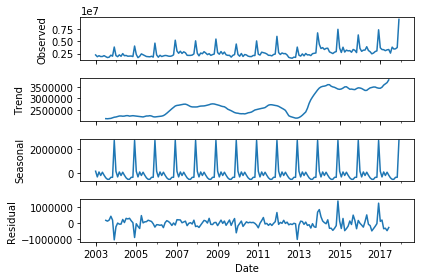

In [12]:
dec_plot(data)

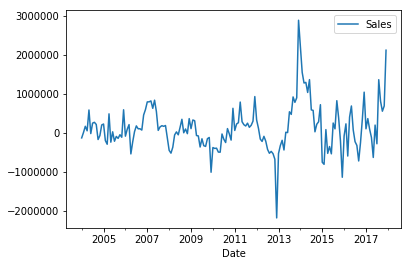

In [13]:
seas_diff=data.diff(12)
seas_diff.dropna(inplace=True)
seas_diff.plot()

In [14]:
adf_test(seas_diff)

ADF Test Statistic       -2.6606099751
p-value                   0.0811059794
#lags used               14.0000000000
# of observations       153.0000000000
Critical value (1%)      -3.4738297757
Critical value (5%)      -2.8806228997
Critical value (10%)     -2.5769448985
dtype: float64


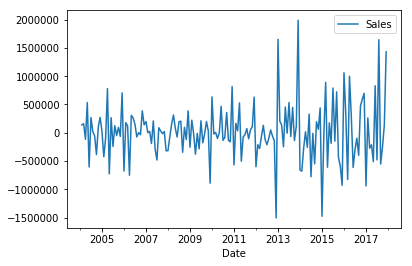

In [15]:
first_diff=seas_diff.diff(1)
first_diff.dropna(inplace=True)
first_diff.plot()

In [16]:
adf_test(first_diff)

ADF Test Statistic       -5.1056919376
p-value                   0.0000136542
#lags used               13.0000000000
# of observations       153.0000000000
Critical value (1%)      -3.4738297757
Critical value (5%)      -2.8806228997
Critical value (10%)     -2.5769448985
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000176F8A251D0>]],
      dtype=object)

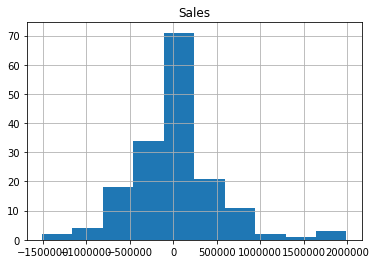

In [17]:
first_diff.hist()

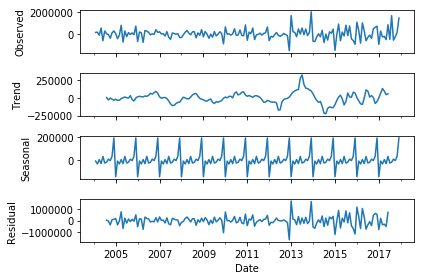

In [18]:
dec_plot(first_diff)

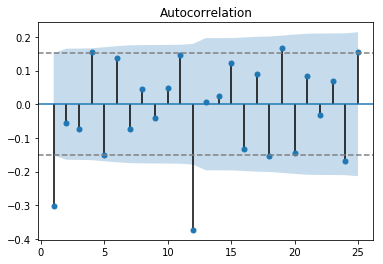

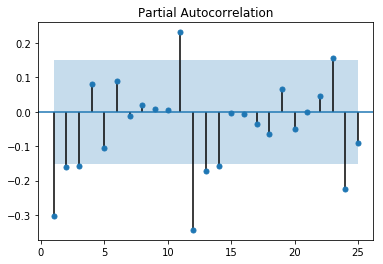

In [19]:
corr_plot(first_diff)

In [20]:
first_diff.index

DatetimeIndex(['2004-02-01', '2004-03-01', '2004-04-01', '2004-05-01',
               '2004-06-01', '2004-07-01', '2004-08-01', '2004-09-01',
               '2004-10-01', '2004-11-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=167, freq=None)

In [21]:
train_data=data.loc[data.index<'2017-01-01']

In [22]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,explained_variance_score
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.statespace.sarimax import SARIMAX

def acc_score(data,show_res):
    n_data= data[data['Forecast'].notnull()]

    y_true=n_data['Sales']
    y_pred=n_data['Forecast']
    RMSE=rmse(y_true,y_pred)
    MAE=mean_absolute_error(y_true,y_pred)
    R2=r2_score(y_true,y_pred)
    MAPE=np.mean(np.abs((y_true-y_pred)/y_true))*100
    
    if show_res==True:
        print(' ERROR MEASURES ')
        print('Root Mean Squared Error: ', RMSE)
        print('Mean Absolute Error: ', MAE)
        print('Mean Absolute Percent Error: ', MAPE)
        print('R2 score: ', R2)
    
    return RMSE,MAE,R2,MAPE

def build_model(data,train_data,param,seasonal_param,show_res):
    data_forecast=data.copy()
   
    model=SARIMAX(train_data,order=param,seasonal_order=seasonal_param
                 # ,enforce_stationarity=False, enforce_invertibility=False
                 )
    model_fit=model.fit()
    data_forecast['Forecast']=model_fit.forecast(steps=12)

    if show_res==True:
        print(model_fit.summary())
        
    return data_forecast,model_fit.aic

def grid_search(data,train_data):
    import itertools
    import warnings
    warnings.filterwarnings("ignore")
    
    p=d=q = range(0,3)
    
    pdq=list(itertools.product(p,d,q))
    PDQ=[(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    arima_model=list()
    for param in pdq:
        for seasonal_param in PDQ:
            try:

                data_forecast,model_aic=build_model(data,train_data,param,seasonal_param,False)
                RMSE,MAE,R2,MAPE=acc_score(data_forecast,False)
                arima_model.append([param,seasonal_param,model_aic,RMSE,MAE,MAPE,R2])  
                
            except:
                continue
    columns=['pdq','PDQ','AIC','RMSE','MAE','MAPE','R2']
    grid_res=pd.DataFrame(arima_model,columns=columns)
    grid_res=grid_res.sort_values(by=['RMSE','MAE','MAPE'],ascending=True)
    print(len(arima_model),(len(grid_res)))

    return grid_res

In [23]:
grid_res=grid_search(data,train_data)
display(grid_res)

389 389


,pdq,PDQ,AIC,RMSE,MAE,MAPE,R2
282,"(2, 0, 0)","(2, 2, 2, 12)",4216.0349853480,6.9107464139e+05,5.7038968557e+05,14.5960621213,0.8370322663
140,"(1, 0, 0)","(2, 2, 2, 12)",4218.4863042245,6.9525355160e+05,5.7147913476e+05,14.6229629701,0.8350553841
157,"(1, 0, 1)","(2, 2, 2, 12)",4215.1048545724,6.9833843698e+05,5.6845023613e+05,14.2907466083,0.8335883967
297,"(2, 0, 1)","(2, 2, 2, 12)",4216.9634924930,7.0264577351e+05,5.6866243855e+05,14.2175261603,0.8315292193
172,"(1, 0, 2)","(2, 2, 2, 12)",4218.1133947722,7.0339974300e+05,5.6826158792e+05,14.1893063110,0.8311674723
...,...,...,...,...,...,...,...
350,"(2, 2, 0)","(0, 0, 0, 12)",5164.9207192395,1.5682359639e+07,1.4552215959e+07,402.6266293705,-82.9217497535
232,"(1, 2, 0)","(0, 0, 2, 12)",5120.2763520726,1.6265348517e+07,1.4979079525e+07,410.2366602423,-89.2772785428
96,"(0, 2, 0)","(0, 0, 1, 12)",5212.4441432063,2.0911512233e+07,1.9217753640e+07,524.2064327756,-148.2184733837
230,"(1, 2, 0)","(0, 0, 0, 12)",5213.6443311751,2.2348300515e+07,2.0579902506e+07,564.6825349877,-169.4279096013


In [24]:
display(grid_res.sort_values(by=['AIC'],ascending=True).head(3))

,pdq,PDQ,AIC,RMSE,MAE,MAPE,R2
56,"(0, 1, 0)","(2, 2, 1, 12)",4135.1207774903,7.3768582068e+05,567357.0928403366,13.7070137386,0.8143074058
57,"(0, 1, 0)","(2, 2, 2, 12)",4139.8982444271,8.5569989562e+05,620880.6311478271,14.4561162813,0.7501411885
55,"(0, 1, 0)","(2, 2, 0, 12)",4172.2314627793,1.3223876323e+06,976270.2189073948,23.0476717317,0.4032818200


###### BEST SARIMAX TERMS ARE (1,2,2),(1,0,1,12) IF SARIMAX MODEL HAS enforce_stationarity=False, enforce_invertibility=False values

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                  168
Model:             SARIMAX(2, 0, 0)x(2, 2, 2, 12)   Log Likelihood               -2101.017
Date:                            Wed, 28 Mar 2018   AIC                           4216.035
Time:                                    16:37:06   BIC                           4237.903
Sample:                                01-01-2003   HQIC                          4224.910
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5959      0.210      2.835      0.005       0.184       1.008
ar.L2          0.2441      0.247   

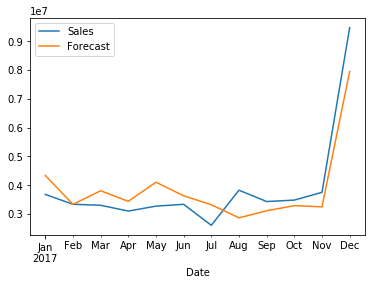

In [23]:
result,aic=build_model(data,train_data,(2,0,0),(2,2,2,12),True)
acc_score(result,True)
test_data=result.loc[result.index>='2017-01-01']
test_data.plot()

In [24]:
print('Final Forecast')
model=SARIMAX(data,order=(2,0,0),seasonal_order=(2,2,2,12))
model_fit=model.fit()
print(model_fit.summary())

Final Forecast
                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                  180
Model:             SARIMAX(2, 0, 0)x(2, 2, 2, 12)   Log Likelihood               -2280.007
Date:                            Wed, 28 Mar 2018   AIC                           4574.014
Time:                                    16:37:11   BIC                           4596.365
Sample:                                01-01-2003   HQIC                          4583.077
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5634      0.208      2.711      0.007       0.156       0.971
ar.L2          0.271

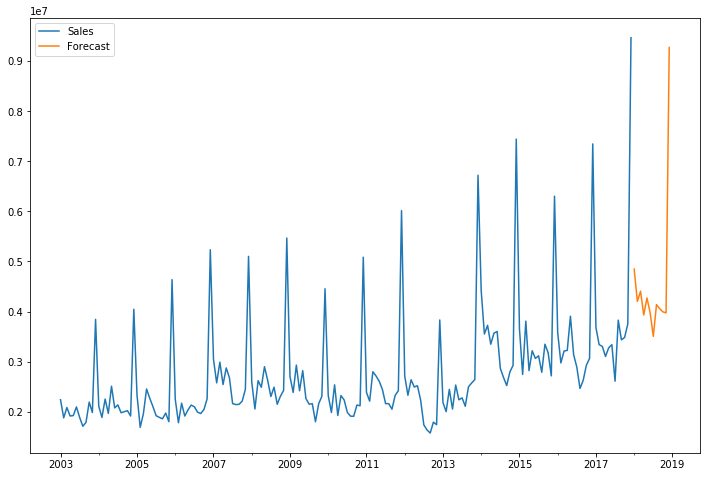

2018-01-01    4.8478316004e+06
2018-02-01    4.2010988640e+06
2018-03-01    4.4061872822e+06
2018-04-01    3.9316699159e+06
2018-05-01    4.2713889876e+06
                    ...       
2018-08-01    4.1382477265e+06
2018-09-01    4.0581496481e+06
2018-10-01    3.9941931371e+06
2018-11-01    3.9741731319e+06
2018-12-01    9.2740035611e+06
Freq: MS, Name: Forecast, Length: 12, dtype: float64


In [25]:
forecast_results=model_fit.forecast(steps=12)
forecast_results.rename('Forecast',inplace=True)
forecast_data=pd.concat((data,forecast_results),axis=1)
forecast_data.plot(figsize=(12,8))
plt.show()
print(forecast_results)

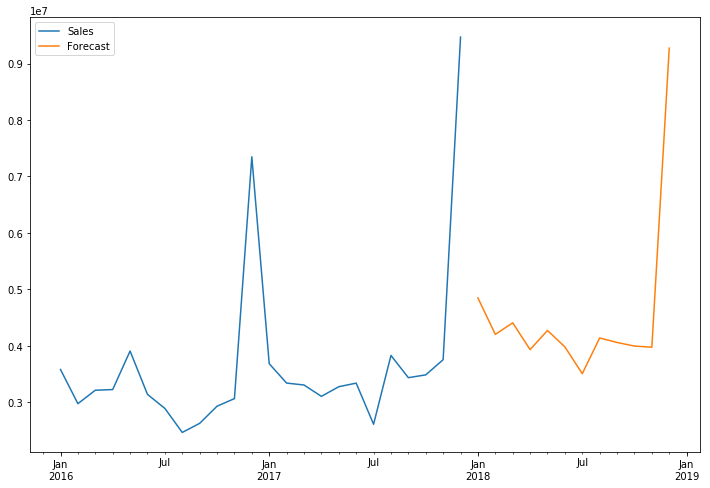

In [26]:
test_data=forecast_data.loc[forecast_data.index>='2016-01-01']
test_data.plot(figsize=(12,8))
plt.show()

In [27]:
writer=pd.ExcelWriter('forecast.xlsx')
forecast_data.to_excel(writer,'2018_forecast')
writer.save()